파이썬 머신러닝 완벽 가이드 개정2판
ch8. 6, 8~9
p.534-538, 550-565

# 8. 텍스트 분석
## 06. 토픽 모델링 (Topic Modeling) - 20 뉴스그룹

토픽 모델링 : 문서 집합에 숨어 있는 주제를 찾아내는 것
- 숨어 있는 중요 주제를 효과적으로 찾아내기
- 숨겨진 주제를 효과적으로 표현할 수 있는 중심 단어를 함축적으로 추출

토픽 모델링 기법
- LSA (Latent Semantic Analysis)
- LDA (Latent Dirichlet Allocation)

20 뉴스 그룹 데이터 세트
- 20가지 주제를 가진 뉴스그룹의 데이터
- 8개의 주제를 추루하고 이들 텍스트에 LDA 기반의 토픽 모델링 적용하기


In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 모터사이클, 야구, 그래픽스, 원도우즈, 중동, 기독교, 의학 8개 주제를 추출
cats = ['rec.motorcycles', 'rec.sport.baseball', 'comp.graphics', 'comp.windows.x', 'talk.politics.mideast', 'soc.religion.christian', 'sci.electronics', 'sci.med']

# 위에서 cats 변수로 기재된 카테고리만 추출. fetch_20newsgroups()의 categrories에 cats 입력
news_df = fetch_20newsgroups(subset='all', remove=('headers','footers','quotes'), categories=cats, random_state=0)

# LDA는 Count 기반의 벡터화만 적용함
count_vect = CountVectorizer(max_df = 0.95, max_features=1000, min_df=2, stop_words = 'english', ngram_range=(1,2))
feat_vect = count_vect.fit_transform(news_df.data)
print('CountVectorizer Shape:', feat_vect.shape)

CountVectorizer Shape: (7862, 1000)


피처 벡터화된 데이터 세트를 기반으로 LDA 토픽 모델링 수행하기

In [2]:
lda = LatentDirichletAllocation(n_components=8, random_state=0)
lda.fit(feat_vect)

LatentDirichletAllocation(n_components=8, random_state=0)

LatentDirichletAllocation 객체는 components_ 속성값을 가지게 됨
- components_는 개별 토픽별로 각 word 피처가 얼마나 많이 그 토픽에 할당됐는지에 대한 수치를 가짐

In [3]:
print(lda.components_.shape)
lda.components_

(8, 1000)


array([[2.69030238e+02, 1.87798026e+02, 7.09003824e+01, ...,
        1.22710343e+01, 1.06329639e+02, 7.25995512e+01],
       [1.25091799e-01, 2.46049106e+00, 1.25051902e-01, ...,
        2.80071176e+02, 1.25089783e-01, 5.05669662e+01],
       [1.33978420e+02, 1.25042012e-01, 9.98277256e+01, ...,
        1.25092219e-01, 3.31078261e+01, 1.25028398e-01],
       ...,
       [2.98813886e+01, 1.88071366e+01, 1.14748730e+01, ...,
        1.93022584e+01, 5.29368271e+00, 1.44478198e+01],
       [1.25074899e-01, 1.25105300e-01, 1.25004235e-01, ...,
        1.03576436e+02, 1.25100535e-01, 7.22276359e+01],
       [1.25172284e-01, 1.03967760e+00, 1.25221075e-01, ...,
        5.31740996e+01, 1.25025929e-01, 1.25062991e-01]])

display_topics() 함수를 만들어서 각 토픽별로 연관도가 높은 순으로 Word를 나열해 보기

In [4]:
def display_topics(model, feature_names, no_top_words):
    for topic_index, topic in enumerate(model.components_):
        print('Topic #', topic_index)

        # components_array 에서 가장 값이 큰 순으로 정렬했을 때, 그 값의 array 인덱스를 반환
        topic_word_indexes = topic.argsort()[::-1]
        top_indexes = topic_word_indexes[:no_top_words]

        # top_indexes 대상인 인덱스별로 feature_names 에 해당하는 word feature 추출 후 join으로 concat
        feature_concat = ' '.join([feature_names[i] for i in top_indexes])
        print(feature_concat)

# CountVectorizer 객체 내의 전체 word의 명칭을 get_features_names()를 통해 추출
feature_names =  count_vect.get_feature_names_out()

# 토픽별 가장 연관도가 높은 word를 15개만 추출
display_topics(lda, feature_names, 15)

Topic # 0
10 year medical health 1993 20 12 disease cancer team patients research number new 11
Topic # 1
don just like know think good time ve does way really people want ll right
Topic # 2
image file jpeg output program gif images format files color entry use bit 03 02
Topic # 3
armenian armenians turkish people said turkey armenia government genocide turks muslim russian greek azerbaijan killed
Topic # 4
israel jews dos jewish israeli dos dos arab state people arabs palestinian adl ed anti peace
Topic # 5
edu com available graphics ftp window use mail data motif software version pub information server
Topic # 6
god people jesus church believe say christ does christian think christians did know bible man
Topic # 7
thanks use using does help like display need problem know server screen windows window program


- Topic #0 : 불분명한 주제어들이 있지만 주로 의학에 관련된 주제어가 추출
- Topic #1 : 명확하지 않고 일반적인 단어
- Topic #2 : 컴퓨터 그래픽스 영역의 주제어가 다수 포함
- Topic #3 : 일반적인 단어로 주제어가 추출
- Topic #4 : 명확하게 중동 영역의 주제어가 추출
- Topic #5 : 일부 컴퓨터 그래픽스 영역의 주제어를 포함, 전반적인 컴퓨터 관련 용어들을 가지고 있어 8개 토픽 중 하나로 매핑하기 어려움
- Topic #6 : 명확하게 기독교 관련 주제어가 추출
- Topic #7 : 윈도우 운영체제와 관련된 주제어

## 08. 문서 유사도
### [문서 유사도 측정 방법 - 코사인 유사도]
코사인 유사도 : 문서와 문서 간의 유사도 비교를 할 때 사용
- 벡터와 벡터 간의 유사도를 비교할 때 벡터의 크기보다는 벡터의 상호 방향성이 얼마나 유사한지에 기반
- 두 벡터 사이의 사잇각을 구해서 얼마나 유사한지 수치로 적용한 것

 - 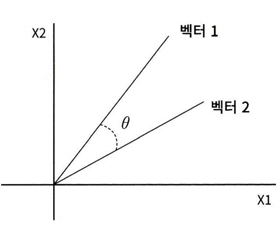

### [두 벡터 사잇각]
- 두 벡터의 사잇각에 따라 상호관계는 유사하거나, 관련이 없거나, 반대 관계
 - 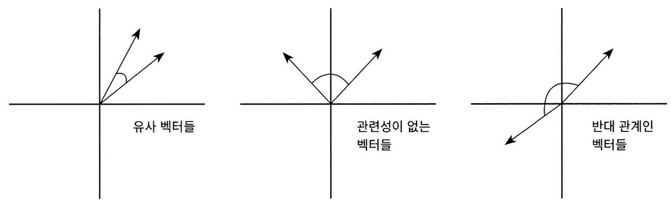

유사도 cos(theta) 구하기
- 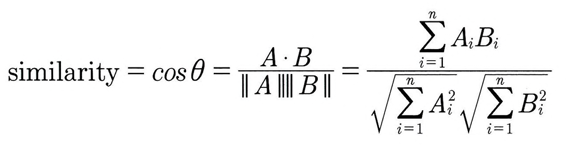

코사인 유사도 기반으로 구해보기
- 코사인 유사도를 구하는 cos_similarity() 함수 사용

In [5]:
import numpy as np

def cos_similarity(v1, v2):
    dot_product = np.dot(v1, v2)
    l2_norm = (np.sqrt(sum(np.square(v1))) * np.sqrt(sum(np.square(v2))))
    similarity = dot_product / l2_norm

    return similarity

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

doc_list = ['if you take the blue pill, the story ends',
            'if you take the red pill, you stay in Wonderland',
            'if you take the red pill, I show you how deep the rabbit hole goes']

tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list)
print(feature_vect_simple.shape)

(3, 18)


두 개 문서의 유사도 측정하기

In [7]:
# TFidfVectorizer로 transform()한 결과는 희소 행렬이므로 밀집 행렬로 변환
feature_vect_dense = feature_vect_simple.todense()

# 첫 번째 문장과 두 번째 문장의 피처 벡터 추출
vect1 = np.array(feature_vect_dense[0]).reshape(-1,)
vect2 = np.array(feature_vect_dense[1]).reshape(-1,)

# 첫 번째 문장과 두 번째 문장의 피처 벡터로 두 개 문장의 코사인 유사도 추출
similarity_simple = cos_similarity(vect1, vect2)
print('문장1, 문장2 Cosine 유사도 : {0:.3f}'.format(similarity_simple))

문장1, 문장2 Cosine 유사도 : 0.402


In [8]:
vect1 = np.array(feature_vect_dense[0]).reshape(-1,)
vect3 = np.array(feature_vect_dense[2]).reshape(-1,)
similarity_simple = cos_similarity(vect1, vect3)
print('문장1, 문장3 Cosine 유사도 : {0:.3f}'.format(similarity_simple))

vect2 = np.array(feature_vect_dense[1]).reshape(-1,)
vect3 = np.array(feature_vect_dense[2]).reshape(-1,)
similarity_simple = cos_similarity(vect2, vect3)
print('문장2, 문장3 Cosine 유사도 : {0:.3f}'.format(similarity_simple))

문장1, 문장3 Cosine 유사도 : 0.404
문장2, 문장3 Cosine 유사도 : 0.456


sklearn.metrics.pairwise.cosine_similarity API를 제공
- 앞 예제의 문서 유사도를 측정
- cosine_similarity()
 - 두 개의 입력 파라미터 : 비교 기준이 되는 문서의 피처 행렬, 비교되는 문서의 피처 행렬
 - 희소 행렬, 밀집 행렬 모두 가능, 행렬 또는 배열 모두 가능

첫 번째 문서와 비교해 바로 자신 문서인 첫 번째 문서, 두 번째, 세 번째 문서의 유사도를 측정

In [9]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple)
print(similarity_simple_pair)

[[1.         0.40207758 0.40425045]]


In [10]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple[1:])
print(similarity_simple_pair)

[[0.40207758 0.40425045]]


1번째 문서와 2,3번째 문서의 코사인 유사도

2번째 문서와 1,3번째 문서의 코사인 유사도

3번째 문서와 1,2번째 문서의 코사인 유사도

In [11]:
similarity_simple_pair = cosine_similarity(feature_vect_simple, feature_vect_simple)
print(similarity_simple_pair)
print('shape:', similarity_simple_pair.shape)

[[1.         0.40207758 0.40425045]
 [0.40207758 1.         0.45647296]
 [0.40425045 0.45647296 1.        ]]
shape: (3, 3)


### [Opinion Review 데이터 세트를 이용한 문서 유사도 측정]
문서 간의 유사도 측정해보기

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
import pandas as pd
import glob, os
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# 필수 NLTK 데이터 다운로드
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [14]:
import pandas as pd
import glob, os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# 디렉터리
path = r'/content/drive/MyDrive/2025-1/2025-1 ESAA OB/과제/data/topics'
# path로 지정한 디렉터리 밑에 있는 모든 .data 파일들의 파일명을 리스트로 취합
all_files = glob.glob(os.path.join(path, '*.data'))
filename_list = []
opinion_text = []

# 개별 파일들의 파일명은 filename_list 리스트로 취합,
# 개별 파일들의 파일 내용은 DataFrame 로딩 후 다시 string으로 변환하여 opinion_text 리스트로 취합
for file_ in all_files:
    # 개별 파일을 읽어서 DataFrame으로 생성
    df = pd.read_table(file_, index_col=None, header=0, encoding='latin1')
    # 절대 경로로 주어진 파일명을 가공. Linux에서 수행 시에는 아래 \\를 / 변경.
    # 맨 마지막 .data 확장자도 제거
    filename_ = file_.split('\\')[-1]
    filename = filename_.split('.')[0]

    # 파일명 리스트와 파일 내용 리스트에 파일명과 파일 내용을 추가
    filename_list.append(filename)
    opinion_text.append(df.to_string())

# 파일명 리스트와 파일 내용 리스트를 DataFrame으로 생성
document_df = pd.DataFrame({'filename': filename_list, 'opinion_text': opinion_text})

In [15]:
# 텍스트 정규화 및 토큰화
def LemNormalize(text):
    wordnet_lemmatizer = WordNetLemmatizer()
    words = word_tokenize(text)  # nltk 토큰화 적용
    return [wordnet_lemmatizer.lemmatize(word) for word in words]


# 빈 문서 제거
document_df = document_df.dropna(subset=['opinion_text'])

# Ensure the 'opinion_text' column contains strings
document_df['opinion_text'] = document_df['opinion_text'].astype(str)

document_df = document_df[document_df['opinion_text'].str.len() > 0]

# TF-IDF 벡터화 (stop_words 제거, min_df 완화)
tfidf_vect = TfidfVectorizer(tokenizer=None, preprocessor=None,
                             ngram_range=(1,2), min_df=0.01, max_df=0.95)
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])


# KMeans 클러스터링
km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0, n_init='auto')
km_cluster.fit(feature_vect)

# 클러스터 결과 저장
document_df['cluster_label'] = km_cluster.labels_

# 희소 행렬 변환 후 cluster_centers_ 접근
cluster_centers = km_cluster.cluster_centers_

- 문서를 피처 벡터화해 변환 -> 문서 내 단어에 출현 빈도와 같은 값을 부여 -> 각 문서가 단어 피처의 값으로 벡터화됨

각 문서가 피처 벡터화된 데이터를 cosisne_simularity()로 상호 비교해 유사도 확인하기

- 호텔을 주제로 군집화된 데이터를 먼저 추출
- 이 데이터에 해당하는 TfidfVectorizer의 데이터를 추출

In [16]:
from sklearn.metrics.pairwise import cosine_similarity

# cluster_label = 2인 데이터는 호텔로 군집화된 데이터. DataFrame에서 해당 인덱스를 추출
hotel_indexes = document_df[document_df['cluster_label']==2].index
print('호텔로 클러스터링 된 문서들의 DataFrame Index:', hotel_indexes)

# 호텔로 군집화된 데이터 중 첫 번째 문서를 추출해 파일명 표시
comparison_docname = document_df.iloc[hotel_indexes[0]]['filename']
print('##### 비교 기준 문서명', comparison_docname, '와 타 문서 유사도 #####')

''' document_df에서 추출한 Index 객체를 feature_vect로 입력해 호텔 군집화된 feature_vect 추출
이를 이용해 호텔로 군집화된 문서 중 첫 번째 문서와 다른 문서 간의 코사인 유사도 측정. '''
similarity_pair = cosine_similarity(feature_vect[hotel_indexes[0]], feature_vect[hotel_indexes])
print(similarity_pair)

호텔로 클러스터링 된 문서들의 DataFrame Index: Index([ 3,  5,  7,  9, 10, 14, 17, 22, 23, 24, 25, 26, 29, 30, 32, 33, 35, 36,
       40, 41, 46, 47],
      dtype='int64')
##### 비교 기준 문서명 /content/drive/MyDrive/2025-1/2025-1 ESAA OB/과제/data/topics/bathroom_bestwestern_hotel_sfo 와 타 문서 유사도 #####
[[1.         0.01741597 0.01768746 0.01213749 0.04925583 0.05729469
  0.05972408 0.0681067  0.05257405 0.09800049 0.45226455 0.0261594
  0.03988043 0.23275195 0.01337784 0.11825254 0.17446181 0.11019323
  0.12343509 0.09966956 0.07799668 0.01672667]]


첫 번째 문서와 다른 문서 간에 유사도를 정렬하고 시각화하기

가장 유사도가 큰 파일명 및 유사도:
 filename      /content/drive/MyDrive/2025-1/2025-1 ESAA OB/ᄀ...
similarity                                             0.452265
Name: 25, dtype: object


Text(0.5, 1.0, '/content/drive/MyDrive/2025-1/2025-1 ESAA OB/과제/data/topics/bathroom_bestwestern_hotel_sfo')

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 4352 (\N{HANGUL CHOSEONG KIYEOK}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 4458 (\N{HANGUL JUNGSEONG WA}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 4364 (\N{HANGUL CHOSEONG CIEUC}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 4454 (\N{HANGUL JUNGSEONG E}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4352 (\N{HANGUL CHOSEONG KIYEOK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4458

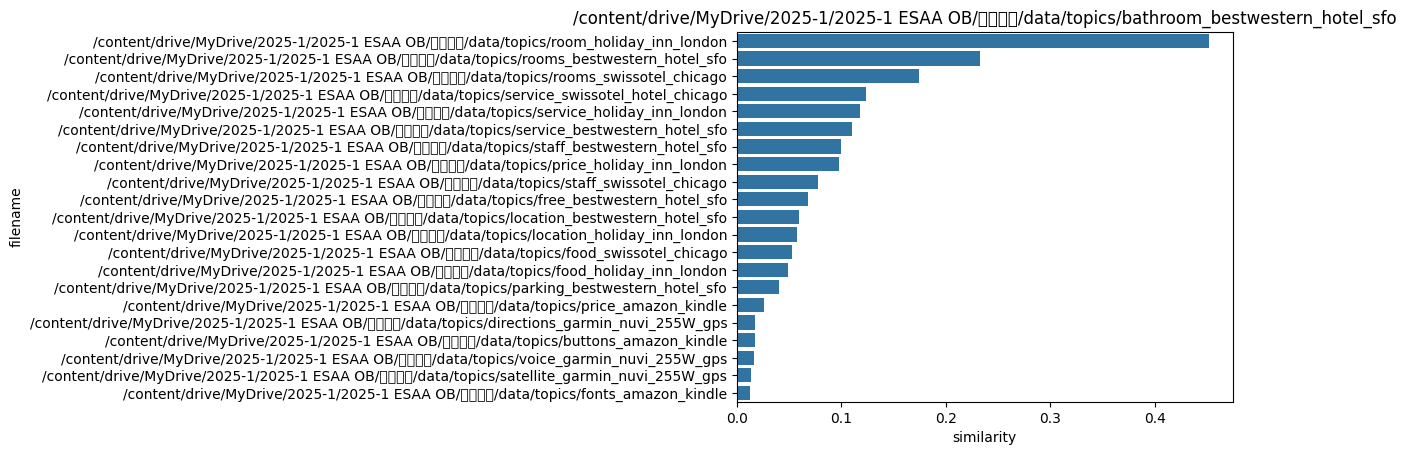

In [17]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 첫 번째 문서와 타 문서 간 유사도가 큰 순으로 정렬한 인덱스 추출하되 자기 자신은 제외
sorted_index = similarity_pair.argsort()[:,::-1]
sorted_index = sorted_index[:, 1:]

# 유사도가 큰 순으로 hotel_indexes를 추출하여 재정렬
hotel_sorted_indexes = hotel_indexes[sorted_index.reshape(-1)]

# 유사도가 큰 순으로 유사도 값을 재정렬하되 자기 자신은 제외
hotel_1_sim_value = np.sort(similarity_pair.reshape(-1))[::-1]
hotel_1_sim_value = hotel_1_sim_value[1:]

# 유사도가 큰 수능로 정렬된 인덱스와 유사도 값을 이용해 파일명과 유사도값을 막대 그래프로 시각화
hotel_1_sim_df = pd.DataFrame()
hotel_1_sim_df['filename'] = document_df.iloc[hotel_sorted_indexes]['filename']
hotel_1_sim_df['similarity'] = hotel_1_sim_value
print('가장 유사도가 큰 파일명 및 유사도:\n', hotel_1_sim_df.iloc[0,:])

sns.barplot(x='similarity', y='filename', data=hotel_1_sim_df)
plt.title(comparison_docname)

=> 첫 번째 문서인 샌프란시스코의 베스트 웨스턴 호텔 화장실 리뷰인 bathroom_bestwestern_hotel_sfp와 가장 비슷한 문서 : room_holidaty_inn_london
- 약 0.514의 코사인 유사도 값

## 09. 한글 텍스트 처리 - 네이버 영화 평점 감성 분석

### [한글 NLP 처리의 어려움]
한글 언어 처리는 영어 등의 라틴어 처리보다 어려움
- '띄어쓰기', '다양한 조사'
- 띄어쓰기에 따라 의미가 왜곡될 수 있음
- 조사가 다양해서 어근 추출 등의 전처리 시 제거하기가 까다로움


### [KoNLPy 소개]
KoNLPy : 파이썬의 대표적인 한글 형태소 패키지
- 형태소 : 단어로서 의미를 가지는 최소 단위

In [18]:
!pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.1/494.1 kB 17.9 MB/s eta 0:00:00


### [데이터 로딩]

네이버 영화 평점 데이터

https://github.com/e9t/nsmc

In [22]:
import pandas as pd

train_df = pd.read_csv('/content/ratings_train.txt', sep='\t', encoding='utf-8')
train_df.head(3)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0


-> 1이 긍정, 0이 부정 감성

In [23]:
train_df['label'].value_counts()

,count
label,
0,75173
1,74827


-> 균등한 분포

In [26]:
import re

train_df = train_df.fillna('')
# 정규 표현식을 이용해 숫자를 공백으로 변경 (정규 표현식으로 \d는 숫자를 의미함)
train_df['document'] = train_df['document'].apply(lambda x : re.sub(r'\d+', '', x))

test_df = pd.read_csv('/content/ratings_test.txt', sep='\t', encoding='utf-8')
test_df = test_df.fillna('')
test_df['document'] = test_df['document'].apply(lambda x : re.sub(r'\d+', '', x))

# id 칼럼 삭제 수행
train_df.drop('id', axis=1, inplace=True)
test_df.drop('id', axis=1, inplace=True)

TF-IDF 방식으로 단어를 벡터화
- 각 문장을 한글 형태소 분석을 통해 형태소 단어로 토큰화하기
- 한글 형태소 엔진은 SNS 분석에 적합한 Twitter 클래스를 이용

In [27]:
from konlpy.tag import Twitter

twitter = Twitter()
def tw_tokenizer(text):
    # 입력 인자로 들어온 텍스트를 형태소 단어로 토큰화해 리스트 형태로 반환
    tokens_ko = twitter.morphs(text)
    return tokens_ko

/usr/local/lib/python3.11/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


사이킷런의 TfidfVectorizer 를 이용해 TF-IDF 피처 모델 생성하기

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Twitter 객체의 morphs() 객체를 이용한 tokenizer를 사용. ngram_range는 (1,2)
tfidf_vect = TfidfVectorizer(tokenizer=tw_tokenizer, ngram_range=(1,2), min_df=3, max_df=0.9)
tfidf_vect.fit(train_df['document'])
tfidf_matrix_train = tfidf_vect.transform(train_df['document'])

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


로지스틱 회귀를 이용해 분류 기반의 감성 분석 수행하기
- 로지스틱 회귀의 하이퍼 파라미터 C의 최적화를 위해 GridSearchCV 이용

In [29]:
# 로지스틱 회귀를 이용해 감성 분석 분류 수행
lg_clf = LogisticRegression(random_state=0, solver='liblinear')

# 파라미터 C 최적화를 위해 GridSearchCV를 이용
params = {'C': [1,3.5,4.5,5.5,10]}
grid_cv = GridSearchCV(lg_clf, param_grid=params, cv=3, scoring='accuracy', verbose=1)
grid_cv.fit(tfidf_matrix_train, train_df['label'])
print(grid_cv.best_params_, round(grid_cv.best_score_, 4))


Fitting 3 folds for each of 5 candidates, totalling 15 fits
{'C': 3.5} 0.8591


테스트 세트를 이용해 최종 감성 분석 예측을 수행하기

In [30]:
from sklearn.metrics import accuracy_score

# 학습 데이터를 적용한 TfidVectorizer를 이용해 테스트 데이터를 TF-IDF 값으로 피처 변환함
tfidf_matrix_test = tfidf_vect.transform(test_df['document'])

# classifier는 GridSearchCV에서 최적 파라미터로 학습된 classifier를 그대로 이용
best_estimator = grid_cv.best_estimator_
preds = best_estimator.predict(tfidf_matrix_test)

print('Logistic Regression 정확도:', accuracy_score(test_df['label'], preds))

Logistic Regression 정확도: 0.86196
